# Assignment \#5

## Working with Data in Python

**Due:** 21st April 2016

This exercise is aimed at developing familiarity with the two primary `pandas` objects. 

* `pd.Series(data, index=index ...)`
* `pd.DataFrame(data, columns=columns, index=index ...)`


In [1]:
#Run this Cell#
%matplotlib inline
import pandas as pd

### Question \#1: Pandas Series

A series is a one-dimensional array-like object containing an array of data and an associated array of data labels (called an `index`). 

* (a) Run the following code and explore the pandas series object
* (b) Answer the questions that are in the cells below marked by `[Q]`


In [2]:
s1 = pd.Series([4,7,-5,3])
s2 = pd.Series([4,7,-5,3], index=['a','b','c','d'])

In [3]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


In [4]:
print(s2)

a    4
b    7
c   -5
d    3
dtype: int64


**[Q]:** What is the different between the `s1` object and the `s2` object

In [7]:
#-Sorting by Value-#
s1.sort_values()

2   -5
3    3
0    4
1    7
dtype: int64

In [8]:
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


**[Q]** Using the above example - please explain how the sort_values() method behaves.

**[Q]** How would you save the object that is sorted by `values`?

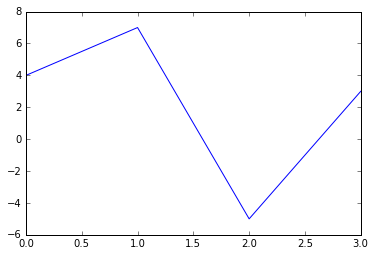

In [9]:
#-Plotting-#
s1.plot()

**[Q]** How would you plot the series that is sorted by values. [**Hint** Use the new sorted pandas series you saved above and pay particular attention to the index values.] Reconstruct the image shown below.

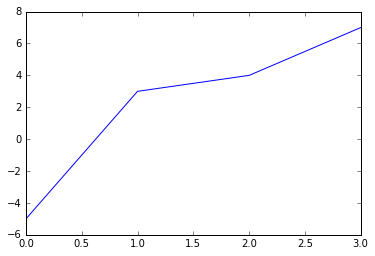

In [10]:
from IPython.display import Image
Image('./assignment5-question1-image1.png')

**[Q]** Explore the Series Object. Work with **two** methods below that you find interesting. 

========================================================================

### Qustion \#2: Pandas DataFrame

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

**Different Representations of Data**

In [38]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

In [39]:
df

,one,two
a,1,1
b,2,2
c,3,3
d,NaN,4


**[Q]** Explain how the `dict()` object **d** is being interpreted by Pandas when constructing the dataframe. 

**[Q]** How else might you represent the original data to construct the same dataframe using only ``lists`` rather than a ``dict`` of ``pd.Series``.

#### Indexing and Values

**[Q]** Using a fresh copy of `df` as is defined below. How would you change the value from `2` to `100` in the column that is indexed by `two`?. Do **not** change the original data -- manipulate the dataframe object

The resulting DataFrame should look like

||one|two|
|-|---|---|
|a|	1 |	1 |
|b|	2 |	100|
|c|	3 |	3 |
|d|	NaN|4 |



In [11]:
#-Fresh Copy of df-#
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)

#### Working with Data

Using the following GDP per person (in 1000's of US Dollars) from 2008 to 2014 from the IMF's *World Economic Outlook* database

In [13]:
import pandas as pd
data = {'BRA': [13.37, 13.30, 14.34, 15.07, 15.46, 15.98, 16.10],
        'JPN': [33.43, 31.83, 33.71, 34.29, 35.60, 36.79, 37.39],
        'USA': [48.30, 46.91, 48.31, 49.72, 51.41, 52.94, 54.60],
        'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014]}
weo  = pd.DataFrame(data)

In [14]:
weo['Year']

0    2008
1    2009
2    2010
3    2011
4    2012
5    2013
6    2014
Name: Year, dtype: int64

**[Q]** How would you set the index of the dataframe object **weo** to be `Year`?

**[Q]** How would you plot all three countries timeseries?

**[Q]** How would you plot just the time series for the `USA`? [*Hint:* How do you select data in a dataframe]

**[Q] (Optional - Challenging)** How would you format the plot to show the full year values? (As shown in the image below)

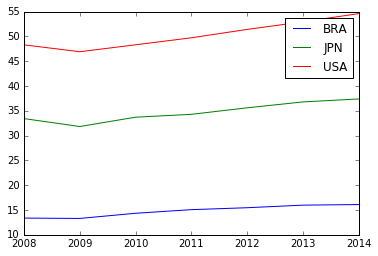

In [80]:
Image('./assignment5-question2-image1.png')

#### Merging Data

In [91]:
df1 = pd.DataFrame([1., 2., 3.], index=['c', 'b', 'a'], columns=['one'])
df2 = pd.DataFrame([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'], columns=['two'])

In [92]:
df1

,one
c,1
b,2
a,3


In [93]:
df2

,two
a,1
b,2
c,3
d,4


Use the `merge` method to combine these two dataframes.

In [98]:
df = df1.merge(df2, left_index=True, right_index=True)

In [99]:
df

,one,two
a,3,1
b,2,2
c,1,3


**[Q]** Based on the results above. What do you notice about the default *merge* behaviour of Pandas DataFrames?

**[Q]** How would you alter the merge so that the resultant dataframe contains the full set of data that is defined in the `df2` object?

The resultant dataframe would look like:

| |one|two|
|-|---|---|
|a|	3 |	1 |
|b|	2 |	2 |
|c|	1 |	3 |
|d|	NaN|4 |

=======================================================================

### Question \#3: World Development Indicators (WDI)

Let's download some WDI data for GDP per Capita (Constant 2005 US$)


In [115]:
from pandas_datareader import data, wb

**[Q]** Explain the above import statement

**Using the `wb` object**

In [116]:
#-Search for GDP per Capita Codes-#
wb.search('gdp.*capita.*const')[['id','name']].head()

,id,name
685,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
7460,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
7462,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
7464,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


In [126]:
#-Download Data-#
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'FR', 'AU'],\
                  start=2005, end=2014)

** View the Data **

In [127]:
dat.head()

NY.GDP.PCAP.KD
country   year                
Australia 2014    37867.767415
          2013    37507.976426
          2012    37241.390414
          2011    36560.441167
          2010    36210.356759

In [128]:
dat.index.levels

FrozenList([['Australia', 'France', 'United States'], ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']])

In [129]:
dat.index.names

FrozenList(['country', 'year'])

**[Q]** What type of object is `dat`

**[Q]** What type of object is `dat['NY.GDP.PCAP.KD']`

**[Q]** What type of object is `dat[['NY.GDP.PCAP.KD']]`

**[Q]** How would you compute the average GDP per capita over all years for each country? [*Hint* Use the `groupby` method]

**[Q]** How can we reshape `dat` so that countries are listed as the columns [*Hint:* Might consider using `unstack`, or `pivot_table` methods]

**[Q]** How would you plot `Australia's` time series of GDP per Capita